In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### A bit of info about covariances


### You have (probably, by now) heard about correlations. 

- you measured quantities x and y and plotting them you see this:

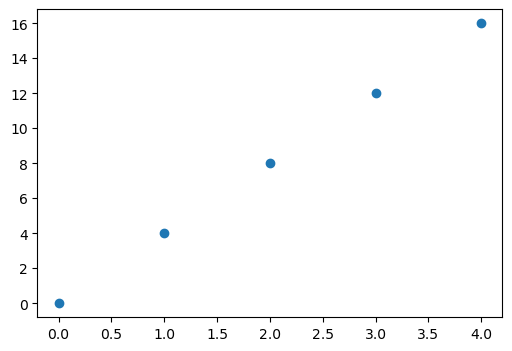

In [2]:
x = np.arange(5)
y = x*4
plt.figure(figsize=(6,4))
dm = plt.scatter( x, y )

- is there a correlation? 

    - yes, positive correlated (they both grow in the same direction)
    
- what about this one?

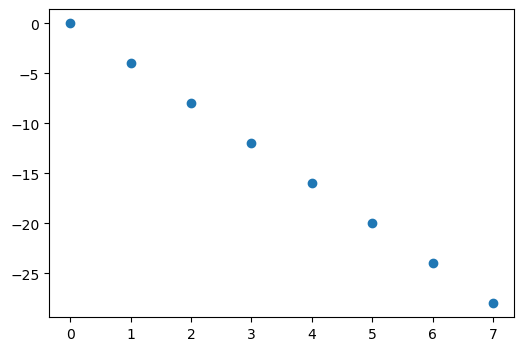

In [3]:
x2 = np.arange(8)
y2 = -x2*4
plt.figure(figsize=(6,4))
dm = plt.scatter( x2, y2 )

- is there a correlation? 

    - yes, negative correlated (anticorrelated; they grow in opposite directions)

### in statistics you measure the correlations with the Pearson's correlation coefficient, aka, the correlation coefficient $R$:

- $R\in[-1, 1]$
- $R=1$ correlated
- $R=-1$ anticorrelated
- $R=0$ no correlation

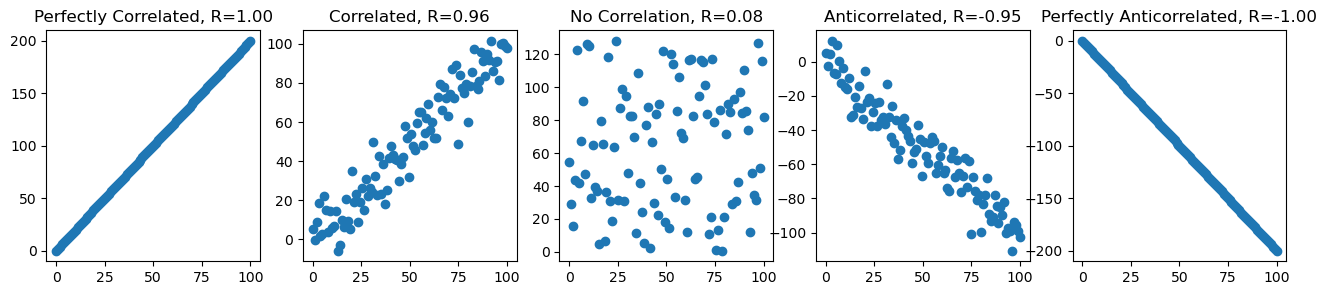

In [4]:
# an example of the different categories:

# Set seed for reproducibility
np.random.seed(42)

# Generate base data
x = np.linspace(0, 100, 100)
noise = np.random.normal(0, 10, 100)

# 1. Perfectly correlated (y = x)
y_perfect_corr = 2* x

# 2. Correlated (y = x + noise)
y_corr = x + noise

# 3. No correlation (y = random)
y_no_corr = np.random.rand(100) * 130

# 4. Anticorrelated (y = -x + noise)
y_anticorr = - x + noise

# 5. Perfectly anticorrelated (y = -x)
y_perfect_anticorr = -2* x

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(16, 3))
axs = axs.ravel()

correlation_coefficient, p_value = pearsonr(x, y_perfect_corr)

axs[0].scatter(x, y_perfect_corr)
axs[0].set_title("Perfectly Correlated, R={0:.2f}".format( correlation_coefficient )  )

correlation_coefficient, p_value = pearsonr(x, y_corr)

axs[1].scatter(x, y_corr)
axs[1].set_title("Correlated, R={0:.2f}".format( correlation_coefficient ))

correlation_coefficient, p_value = pearsonr(x, y_no_corr)

axs[2].scatter(x, y_no_corr)
axs[2].set_title("No Correlation, R={0:.2f}".format( correlation_coefficient ))

correlation_coefficient, p_value = pearsonr(x, y_anticorr)


axs[3].scatter(x, y_anticorr)
axs[3].set_title("Anticorrelated, R={0:.2f}".format( correlation_coefficient ))

correlation_coefficient, p_value = pearsonr(x, y_perfect_anticorr)

axs[4].scatter(x, y_perfect_anticorr)
dm = axs[4].set_title("Perfectly Anticorrelated, R={0:.2f}".format( correlation_coefficient ))


### Think-Pair-Share (5 min):

### Name 2 example each of a correlated, not correlated and anticorrelated physical (preferably astronomical) quantities

Correlated:
1. hubble expansion
2. radiative trasnfer from star to planet
3. mass and gravity

Not-correlated:
1. measurement of radii and mass of a planet
2. 

Anti-correlated:
1. gravity and radii

### The correlation coefficient is a normalized version of the covariance:
- $R$ is defined as the covariance of the two variables you study (x,y) divided by the product of their standard deviations ($\sigma_x \sigma_y$):
$$ R=\frac{\mathrm{cov}(x,y)}{\sigma_x \sigma_y} $$


- The covariance $\mathrm{cov}(x,y)$ is a measure of the tendency of two variables $x$,$y$ to change together (in the same direction or not). The covariance is defined as:
$$ \mathrm{cov}(x,y) = E[(x−E[x])(y−E[y])]$$
 where $E[x]$ is the expected value of $x$, aka the mean $\bar x$
 
- If you remember from the previous lecture we saw the covariance as: 
$$\sigma_{xy}^2= \lim_{N\rightarrow \infty}\left[\frac{1}{N}\Sigma(x_i-\bar x)(y_i-\bar y)\right] $$
which is the same thing :) 

</br>

  - note that $\sigma_{xy}^2$ is not normalized, so it can be any number
</br>
</br>
- In many applications you will see in astronomy your x and y will not be correlated, hence $\sigma_{xy}^2\sim0$ and you will not care; your error propagation is straightforward 

- However, if your data are correlated and you ignore this fact you can under- or over-estimate your errors

</br>
</br>
- We will revisit the covariance matrix later on when we talk about fitting of data

### 1. Think-pair-share (20 min)

### Star Proxima Cen has a radius of $0.1542\pm0.0045 R_\odot$ and is at a distance of $4.2465 \pm 0.0003$ ly from the Earth. Assuming that a unit surface of the star emits 4.965e+04 erg/cm^2/s/A at $\sim550$nm (using a BT-NextGen model), what is the total Proxima Cen flux (and error) that will reach a unit surface at the Earth?

- things to keep in mind: 
    - assume we know the radius of the Sun perfectly (otherwise you need more error propagation)
    - how much is the total energy emitted toward the Earth if you know the energy emitted from a unit surface?
    - which basic physics law connects the flux at point A with the flux reaching point B?
    
    
- Try solving it on your own
- Ask AI to solve it for you! What is your prompt? How does AI perform?

Flux starting from Prox Cen is 3.5968e+25+-2.0993e+24
Flux reaching a unit surface at Earth's distance is 2.2283e-12+-1.3006e-13


### 2. Think-Pair-Share (15 min)

### Major Tom is travelling through the Solar system and is lost! The only clues he has at to where he is, is a pendulum he has with him with length $L = 2.00\pm 0.01$m, a stopwatch and a chart of the gravities of bodies in the Solar system: 



Celestial Body | Gravitational Acceleration (m/s²) |
|----------------|-----------------------------------|
| Earth          | 9.807                             |
| Moon           | 1.62                              |
| Mars           | 3.71                              |
| Venus          | 8.87                              |
| Mercury        | 3.7                               |
| Ceres          | 0.27                              |
|

### He remembers that he can use the pendulum and the stopwatch to figure out the gravity and where he is!
### He takes the following measurements for the period of the pendulum:

In [25]:
t_meas = np. array([4.55, 4.62, 4.51, 4.71, 4.69, 4.58, 4.65, 4.63, 4.52, 4.64,
                    4.66, 4.68, 4.58, 4.54, 4.71, 4.68, 4.67, 4.52, 4.61, 4.63])

### Calculate the gravity (and error). Can he tell which Solar system body he is on? If not, what would he need to do better to accomplish this? 

### Try to solve it on your own first and then ask AI. What is your prompt? How accurate is the answer?

In [26]:
#mean:
# 1/N Sigma (x)
t_mean = (np.sum(t_meas)) / len(t_meas)

#sigma
# (1/(N-1)) * Sigma( (x-2) **2)
sig  = np.sqrt( np.sum((t_meas - t_mean)**2) / (len(t_meas) -1) )
           
#vs the np func:
print('The average time is: {0:.2f} +- {1:.2f}'.format(t_mean, sig))

The average time is: 4.62 +- 0.07


In [31]:
#equation for gravity
L, L_error = 2.00 , 0.01

#gravity
g = L * 4 * np.pi**2 / ( t_mean)**2
print(g)


#uncertainty:
par1 = 1 / (4*np.pi**2*t_mean**2)   #respect to L
par2 = - L / (2 * np.pi**2 * t_mean**3)           #respect to R1

#dv = np.sqrt( (par1*I_error)**2 + (par2*R1_error)**2 + (par3*R2_error)**2)
#print('The voltage is: {0:.2f} +- {1:.2f}'.format(V, dv))

3.7007845972530915


### 3. (10 min) 
### What is $df$ if $x = 2.1\pm 0.3$, $y = 12.22\pm 0.25$ and:

1. $f = x * y$
2. $f = e^x +2 *y$
3. $f = \cos(2*\pi /x) + y**3$

### 4. Think -Pair-Share (35 min) 

### Assume the orbit of Mars is circular with $R_M= (2.2790\pm 0.0218)*10^{11}$m and that of the Earth is also circular with $R_E= (1.496\pm 0.002)*10^{11}$m. A spaceship wants to travel between Earth and Mars. What is the speed it needs to have [km/s] to make sure it doesn't miss a Mars encounter if: 
- Mars has an orbital speed of $u_M=24.1\pm0.2$ km/s and the spaceship started its trip when Mars was trailing Earth by $60^\circ$ in its orbital path? 
- Due to weight limitations the spaceship has enough fuel to travel the minimum distance possible between the two planets, so if anything goes wrong it will be lost to space!

- Try solving this on your own (25 min); Then ask AI to do this for you (10 min). What is the prompt you use? How does it perform in comparison to your solutions?